In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("./dataset/titanic/train.csv")
print('The shape of our training set: %s passengers and %s features'%(dataset.shape[0],dataset.shape[1]))
dataset.isnull().sum()

The shape of our training set: 891 passengers and 12 features


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ok so we have 177 null values in Age column.
687 missing values in Cabin column.
2 missing values in Embarked column.

In [3]:
#if autocomplete not working try this .but have to run in every single notebook
# %config Completer.use_jedi = False

In [4]:
#or you can upgrade jedi . may work for you
# !pip install --upgrade jedi==0.17.2

In [5]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='count'>

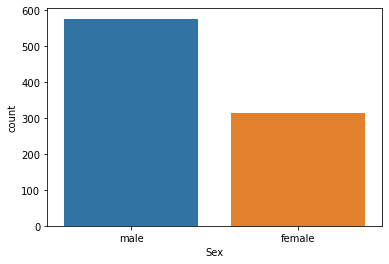

In [8]:
"""
Our target is to find whether a person will survive or not, to predict whether sex is correlated to survival or not, we need
to predict who has more ratio of survival - male or female? , if ratio of survival is same for both male and female, that
means sex is not a significant field in predicting the survival, but if the ratio is different, that means gender
does matter in predicting whether the person will survive or not.
"""
#creating visuals for comparing easily
gender=dataset['Sex']
#sns.countplot(gender) runs but also give warning
sns.countplot(x=dataset['Sex'],data=dataset)

<AxesSubplot:xlabel='Survived', ylabel='count'>

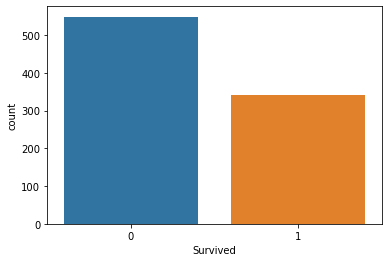

In [9]:
#It's clearly visible that in titanic, number of males is more than the number of females, but we're looking for who
# survived more.
sns.countplot(x="Survived",data=dataset)

<AxesSubplot:xlabel='Survived', ylabel='count'>

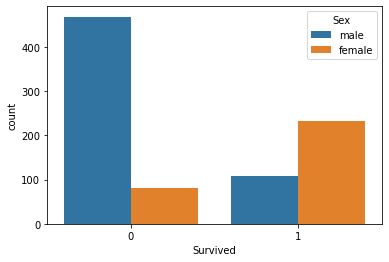

In [10]:
"""We can see that very less ppl survived, but if we want to know the ratio of males and females who survived,
this concept is known as DATA AGGREGATION. We're aggregating the data by group, to do that:"""
sns.countplot(x="Survived",hue="Sex",data=dataset)

Now we can clearly see the difference, female survived more as compared to male. So sex is one of the significant feature in the dataset and we can never eliminate this feature.

<AxesSubplot:xlabel='Survived', ylabel='count'>

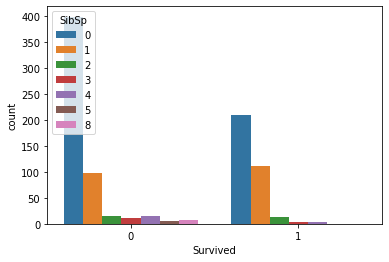

In [11]:
sns.countplot(x="Survived",hue="SibSp",data=dataset)

<AxesSubplot:xlabel='Survived', ylabel='count'>

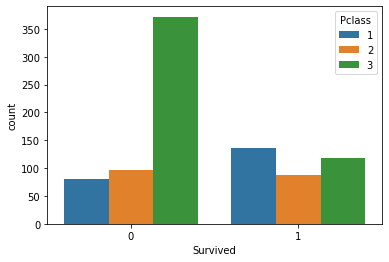

In [12]:
sns.countplot(x="Survived",hue="Pclass",data=dataset,)

<AxesSubplot:xlabel='Survived', ylabel='count'>

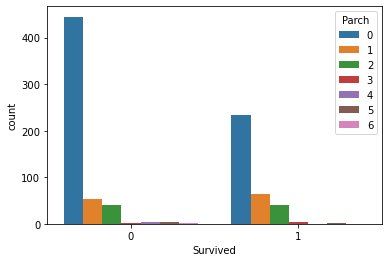

In [13]:
sns.countplot(x="Survived",hue="Parch",data=dataset)

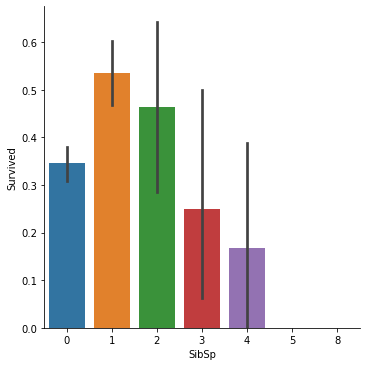

In [14]:
sns.catplot(x="SibSp",y="Survived",data=dataset,kind='bar')

catplot is diff from countplot.
**Conclusion**:
* Passengers having 1 or 2 siblings have good chances of survival
* More no. of siblings -> Less chances of survival

/home/deepak/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/deepak/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


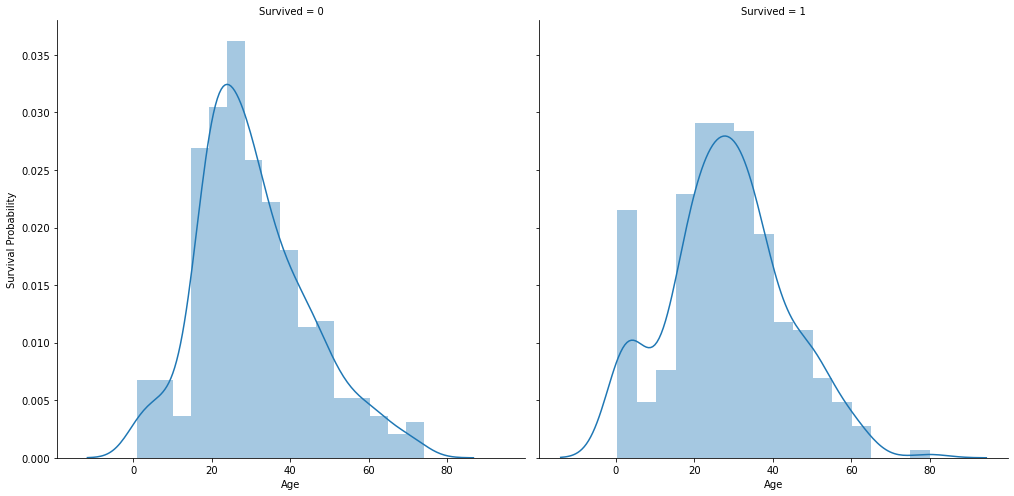

In [16]:
ageplot = sns.FacetGrid(dataset, col="Survived", height = 7)
ageplot = ageplot.map(sns.distplot, "Age")
ageplot = ageplot.set_ylabels("Survival Probability")